### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [121]:
df=pd.read_csv(r"C:\Users\hp\Downloads\jupyter\titanic_data.csv")

In [122]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types of Features**
- **Categorical**:- Sex, Embarked
- **Continuous**:- Age, Fare
- **Discrete**:- SibSp, Parch
- **AlphaNumeric**:- Cabin

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values present in the columns such as Age, Cabin, Embarked.

### Numerical Data Analysis

In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

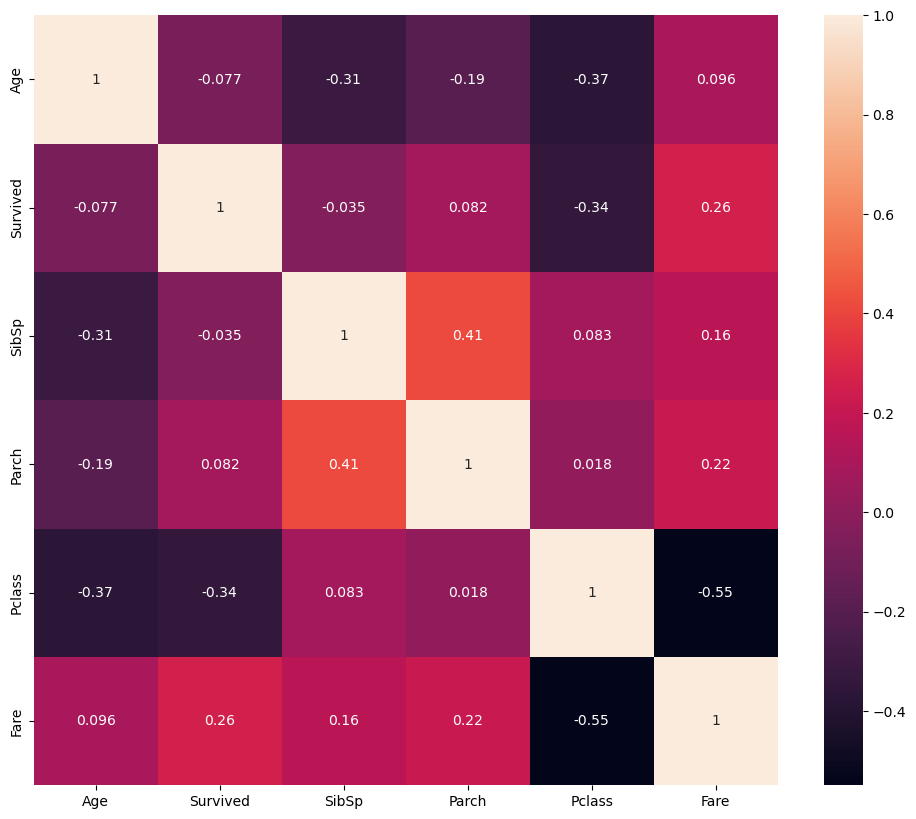

In [126]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['Age', 'Survived', 'SibSp', 'Parch','Pclass', 'Fare']].corr(), annot=True)

### <font color='brown'> SibSp/ Parch/Pclass relationship with Survival.</font>

In [127]:
df['SibSp'].nunique()

7

In [128]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

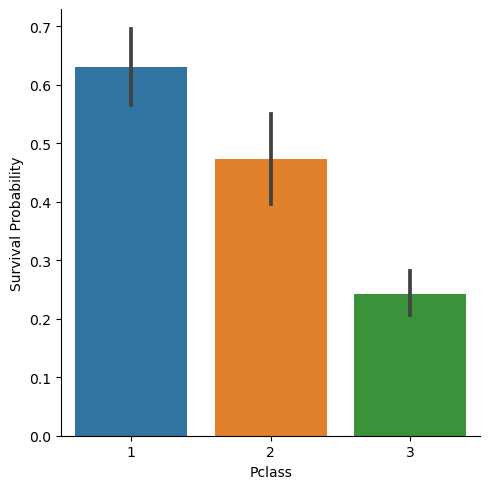

In [129]:
sns.catplot(x='Pclass', y='Survived', data=df, kind='bar', estimator='mean').set_ylabels('Survival Probability')

This Graph clearly shows that the people of pclass 1 have survived more than that of pclass 2 and 3.

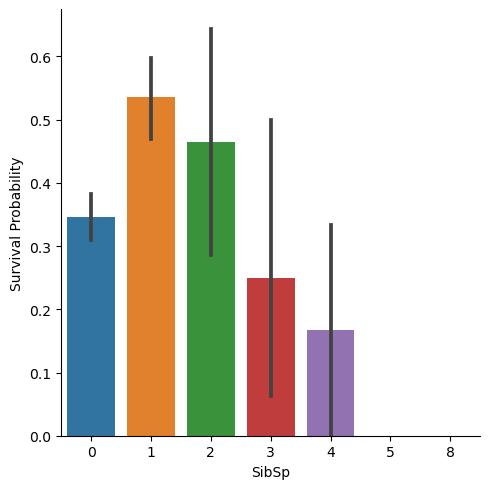

In [130]:
sns.catplot(x='SibSp', y='Survived', data=df, kind='bar', estimator='mean').set_ylabels('Survival Probability')

In this we can see that the family where there is 1 sib or spouse have been saved more than 2 than 0 than 3 and 4.

From this graph we can also see that siblings of number 5 or 8 have the least chance of getting saved.

<Figure size 1200x1000 with 0 Axes>

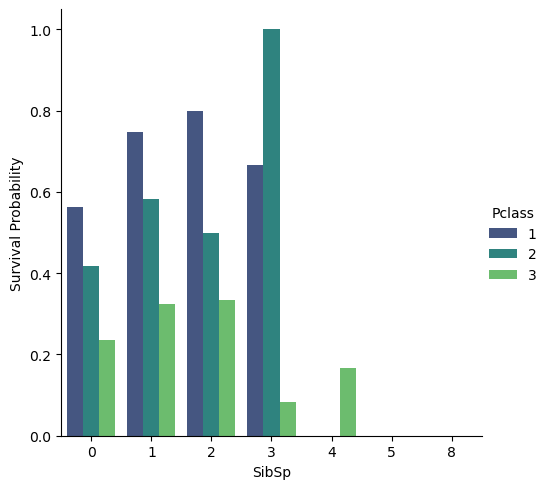

In [131]:
plt.figure(figsize=(12,10))
sns.catplot(x='SibSp', y='Survived', data=df, kind='bar', estimator='mean', hue='Pclass', palette='viridis', ci=None).set_ylabels('Survival Probability')

<Figure size 1200x1000 with 0 Axes>

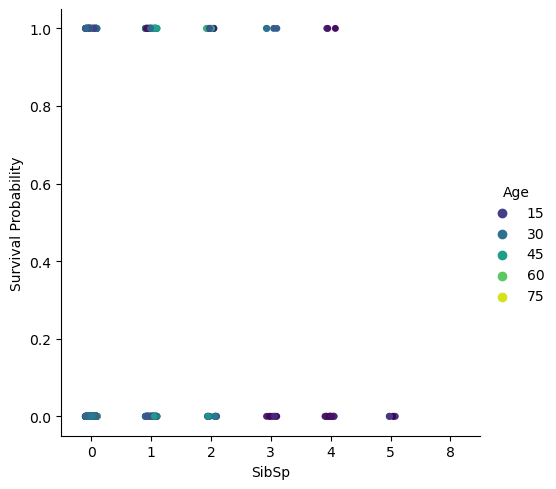

In [132]:
plt.figure(figsize=(12,10))
sns.catplot(x='SibSp', y='Survived', data=df, estimator='mean', hue='Age', palette='viridis', ci=None).set_ylabels('Survival Probability')

***As we can see that in the survived class there is a high chance that people within age 15-45 have survived***

### <font color='Red'>AGE</font>

<Figure size 3800x1000 with 0 Axes>

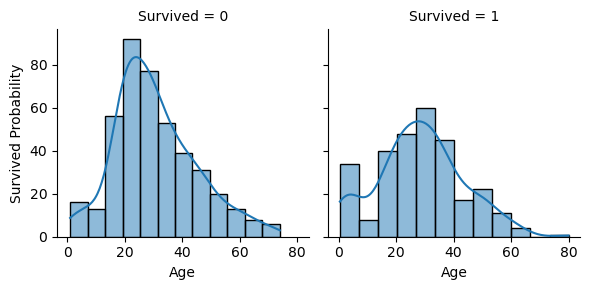

In [133]:
plt.figure(figsize=(38,10))
age_visual=sns.FacetGrid(df, col='Survived')
age_visual=age_visual.map(sns.histplot, 'Age', kde=True, bins=12).set_ylabels('Survived Probability')

As we can see that in the survived column there is a peak in the section where the age is much smaller and hence this proves that childern are prioritized as 1st ones to save and people of age 60 - 80 have reduced number in the survived map and increased number in the not survived map

But we can also see that people within age group 20-40 have died more but also survived more which means that people within age group 20-40 travelling were greater in number.

### <font color='Green'>GENDER</font>

In [134]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
male=pd.get_dummies(df['Sex'], drop_first=True).astype(int)

In [136]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [137]:
df=pd.concat([df, male], axis=1)

In [138]:
df.rename(columns={'male':'Male'}, inplace=True)

Text(0, 0.5, 'Survived Probability')

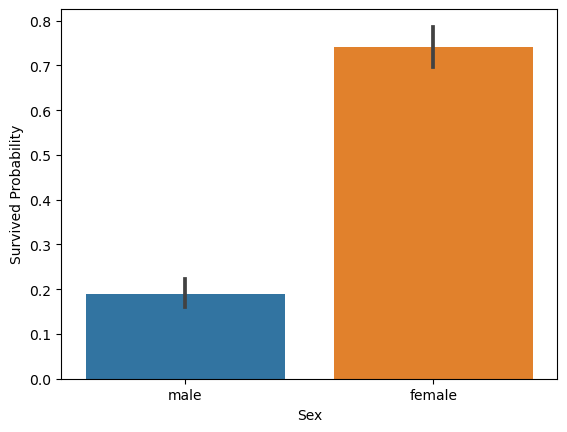

In [139]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.ylabel('Survived Probability')

***Clearly we can see that females survived were more and were prioritized to get saved first.***

In [140]:
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


Text(0, 0.5, 'Survived')

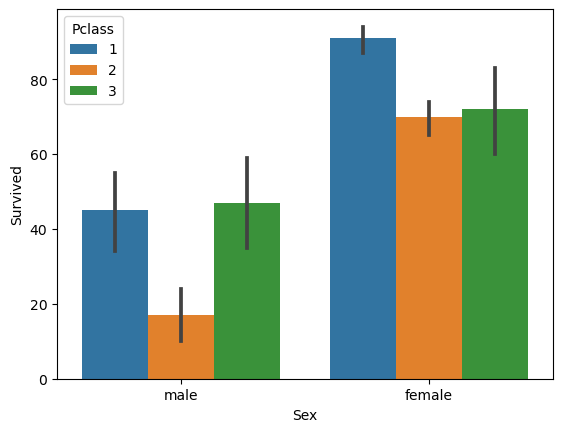

In [141]:
sns.barplot(x='Sex', y='Survived',hue='Pclass', data=df, estimator='sum')
plt.ylabel('Survived')

In [142]:
df[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


we can see that people from class one and 3 are saved more than from class 2. But why?

<Axes: xlabel='Age', ylabel='Pclass'>

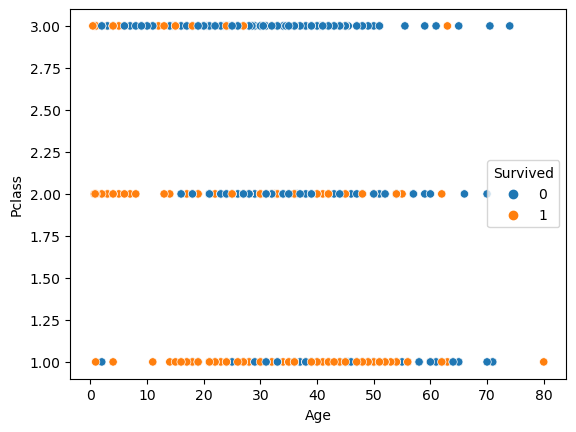

In [143]:
sns.scatterplot(x='Age', y='Pclass',hue='Survived', data=df)

<Axes: xlabel='Age', ylabel='Pclass'>

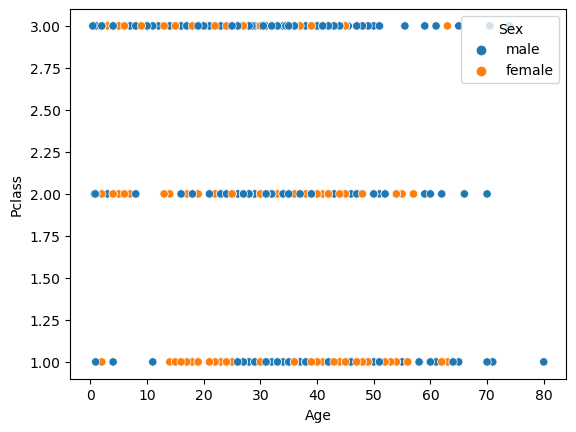

In [144]:
sns.scatterplot(x='Age', y='Pclass',hue='Sex', data=df)

****The reason of saving more people from pclass 1 and 3 is that there are females in pclass 1 and more children in pclass. Hence the reason of saving more people from pclass 1 and 3.****

### <font color='Green'>EMBARKED</font>

In [145]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [150]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [149]:
df['Embarked']=df['Embarked'].fillna('S')

Filling the nan values with s (which are only 2 in number) since there are many people are coming from s

Text(0, 0.5, 'Survived Probability')

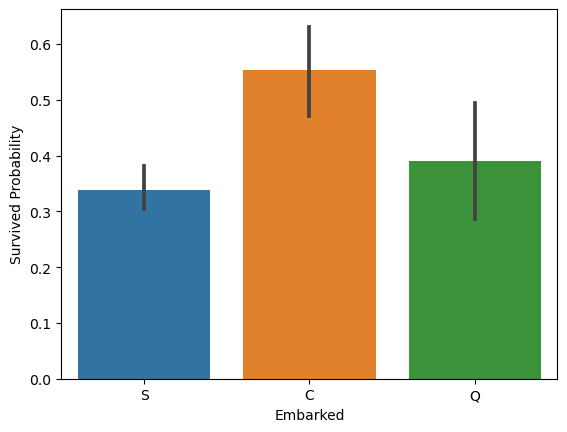

In [151]:
sns.barplot(x='Embarked', y='Survived', data=df).set_ylabel('Survived Probability')

***Reason behind saving many people from Embarked C?***

Text(0, 0.5, 'Survived Probability')

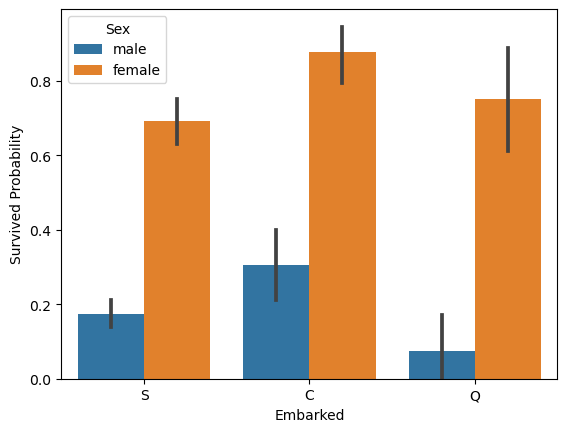

In [152]:
sns.barplot(x='Embarked', y='Survived', data=df, hue='Sex').set_ylabel('Survived Probability')

Text(0, 0.5, 'Survived Probability')

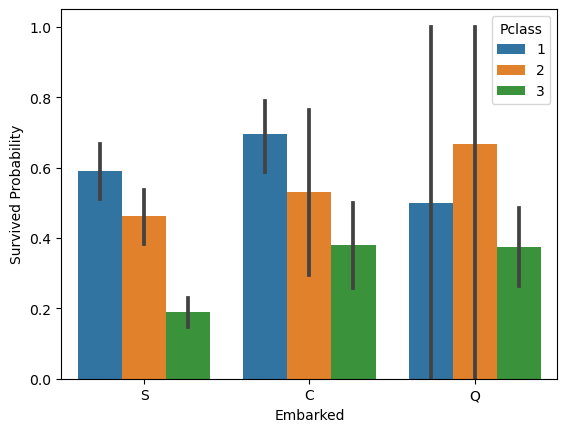

In [153]:
sns.barplot(x='Embarked', y='Survived', data=df, hue='Pclass').set_ylabel('Survived Probability')

Text(0, 0.5, 'Survived Probability')

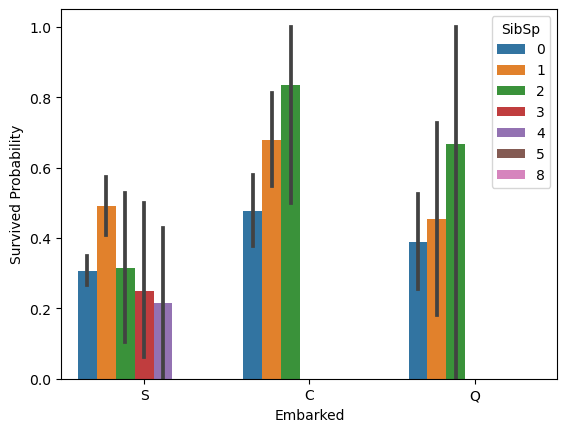

In [154]:
sns.barplot(x='Embarked', y='Survived', data=df, hue='SibSp').set_ylabel('Survived Probability')

Text(0, 0.5, 'Survived Probability')

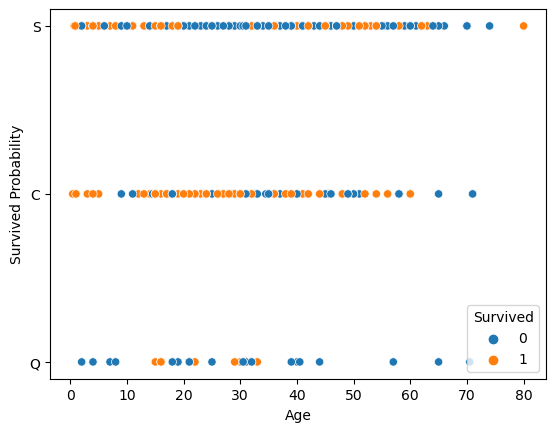

In [155]:
sns.scatterplot(x='Age',data=df, y='Embarked', hue='Survived').set_ylabel('Survived Probability')

Text(0, 0.5, 'Survived Probability')

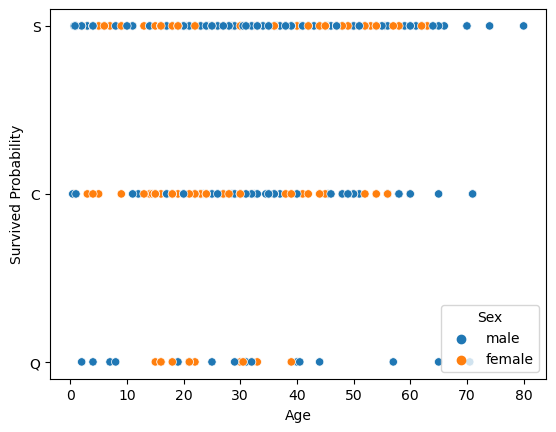

In [156]:
sns.scatterplot(x='Age',data=df, y='Embarked', hue='Sex').set_ylabel('Survived Probability')

<Axes: xlabel='Embarked', ylabel='Survived'>

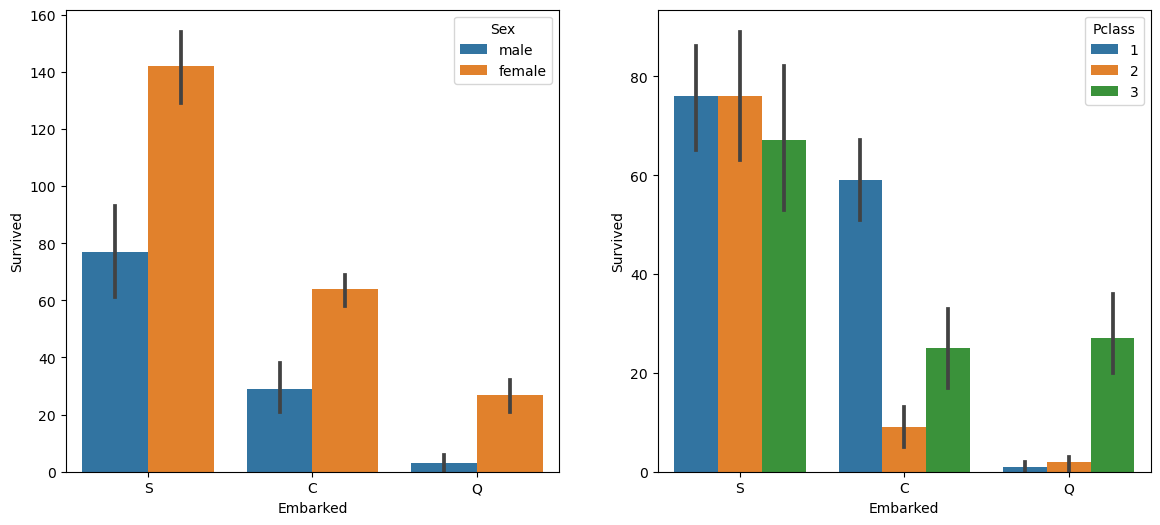

In [157]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.barplot(x='Embarked', y='Survived', data=df, hue='Sex',estimator=sum ,ax=ax[0])
sns.barplot(x='Embarked', y='Survived', data=df, hue='Pclass', estimator=sum,ax=ax[1])

The conclusion is that:
- Female arriving from c are more
- There are around 2 or 3 siblings/spouse which are greater in number which are coming from c
- the people of age group 0-10 are more in c group and also the age group which is most saved i.e 20-40 is also more in c group(we have seen that earlier).

### Preparing Data

In [158]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [159]:
del df['Male']

In [160]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [161]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Since age is an important factor we need to replace age null values with some values. but we wont be calculating the mean we will be taking the data within the 64% of the data since the data is in the form of Normal Distribtion i.e within the range **mean+std, mean-std**.

In [162]:
mean=df['Age'].mean()
std=df['Age'].std()
is_null=df['Age'].isnull().sum()

In [163]:
print(mean, std)

29.69911764705882 14.526497332334044


In [164]:
age_ran=np.random.randint(mean-std, mean+std, size=is_null)

In [165]:
age_ran

array([23, 18, 35, 15, 23, 28, 41, 41, 35, 38, 32, 43, 38, 26, 32, 20, 25,
       28, 29, 27, 32, 22, 26, 39, 17, 25, 34, 20, 33, 41, 22, 15, 16, 43,
       16, 28, 37, 32, 23, 21, 30, 41, 29, 34, 24, 31, 41, 23, 29, 24, 34,
       41, 38, 37, 25, 16, 15, 24, 16, 32, 32, 31, 37, 41, 20, 16, 42, 33,
       16, 32, 41, 39, 28, 37, 34, 19, 35, 22, 18, 19, 31, 24, 26, 39, 37,
       19, 20, 17, 17, 28, 17, 18, 37, 26, 43, 25, 43, 19, 16, 38, 38, 19,
       42, 30, 23, 15, 18, 39, 29, 36, 28, 25, 21, 42, 23, 16, 28, 27, 42,
       24, 24, 37, 28, 28, 36, 24, 22, 24, 25, 32, 25, 20, 40, 31, 35, 20,
       16, 42, 25, 33, 38, 41, 39, 27, 41, 32, 23, 38, 21, 20, 25, 32, 22,
       36, 22, 25, 34, 30, 29, 35, 26, 23, 41, 43, 25, 15, 36, 28, 39, 39,
       41, 15, 43, 43, 32, 26, 37])

In [166]:
type(age_ran)

numpy.ndarray

In [167]:
a=df["Age"].copy()

In [168]:
np.isnan(a)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [169]:
a[np.isnan(a)]=age_ran

In [170]:
a.isnull().sum()

0

In [171]:
df['Age']=a

In [172]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    37.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [175]:
df.drop(['PassengerId','Cabin','Ticket','Name'], axis=1, inplace=True)

In [176]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [177]:
gender={'male':0, 'female':1}
df['Sex']=df['Sex'].map(gender)

In [178]:
embark={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(embark)

In [179]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Splitting of data

In [180]:
y=df['Survived']

In [218]:
x1=df.drop('Survived', axis=1)

In [203]:
y.isnull().sum()

0

In [219]:
x1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [220]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x1,y, test_size=0.30, random_state=42)

In [221]:
x_train.shape

(623, 7)

In [222]:
x_test.shape

(268, 7)

In [223]:
y_train.shape

(623,)

In [224]:
y_test.shape

(268,)

### Scaling

In [225]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Classification

In [226]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [227]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
rf_classifier=RandomForestClassifier(n_estimators=100)

In [228]:
logreg.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [229]:
logregy_pred=logreg.predict(x_test)
svcy_pred=svc_classifier.predict(x_test)
dty_pred=dt_classifier.predict(x_test)
knny_pred=knn_classifier.predict(x_test)
rfy_pred=rf_classifier.predict(x_test)

In [238]:
from sklearn.metrics import mean_squared_error

In [240]:
print(mean_squared_error(y_test, logregy_pred))
print(mean_squared_error(y_test, svcy_pred))
print(mean_squared_error(y_test, dty_pred))
print(mean_squared_error(y_test, knny_pred))
print(mean_squared_error(y_test, rfy_pred))

0.19402985074626866
0.1828358208955224
0.23134328358208955
0.2126865671641791
0.19776119402985073


In [230]:
from sklearn.metrics import accuracy_score

In [231]:
logreg_acc=accuracy_score(y_test,logregy_pred)
svc_acc=accuracy_score(y_test,svcy_pred)
dty_acc=accuracy_score(y_test,dty_pred)
knn_acc=accuracy_score(y_test,knny_pred)
rf_acc=accuracy_score(y_test,rfy_pred)

In [232]:
print('Accuracy of logistic Regression:',round(logreg_acc*100,2))
print('Accuracy of Support vector Classsifier:', round(svc_acc*100,2))
print('Accuracy of decision Tree:', round(dty_acc*100,2))
print('Accuracy of KNN:', round(knn_acc*100,2))
print('Accuracy of Random Forest:',round(rf_acc*100,2))

Accuracy of logistic Regression: 80.6
Accuracy of Support vector Classsifier: 81.72
Accuracy of decision Tree: 76.87
Accuracy of KNN: 78.73
Accuracy of Random Forest: 80.22


***From this we can conclude that the Support Vector Classifier is the most accurate in this dataset.***

<function matplotlib.pyplot.show(close=None, block=None)>

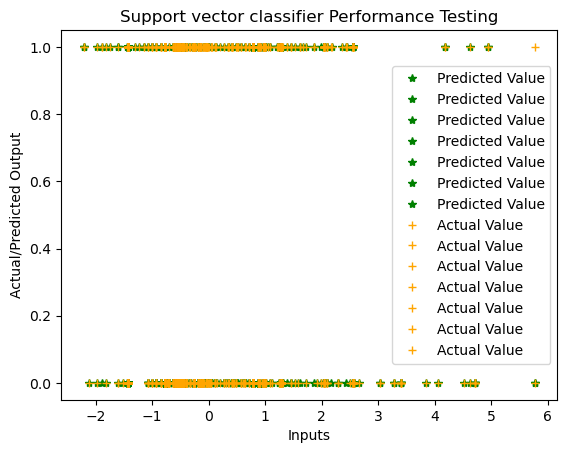

In [242]:
plt.plot(x_test,svcy_pred,  '*', label='Predicted Value', color='Green')
plt.plot(x_test, y_test, '+', label='Actual Value', color='Orange')
plt.title('Support vector classifier Performance Testing')
plt.xlabel('Inputs')
plt.ylabel('Actual/Predicted Output')
plt.legend()
plt.show

Hence we can see that the support vector classifier has classified so well that both th predicted and the actual values are almost overlapping.